# Imports

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
import pandas as pd
pd.set_option("display.precision", 10)
import datetime as dt
import seaborn as sb
import pyarrow as pa
from patsy import dmatrices
import statsmodels.api as sm
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn import datasets
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
pd.set_option("display.precision", 3)
from sklearn.cluster import KMeans
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Model
from tensorflow import keras
import time
import imageio as iio
import os
images = []
labels = []

In [2]:
def list_folders(directory):
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    return folders

In [3]:
def plot_loss_accuracy(history):
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Data Import

In [4]:
folders_list_train = list_folders("Images")
#folders_list_test = list_folders("test")

In [5]:
for folder in folders_list_train:
        subdirect = ""
        subdirect = os.path.join("Images", folder)
        image_files = os.listdir(subdirect)
        for file in image_files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(subdirect, file)
                image = iio.v3.imread(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(folder)

In [6]:
images = np.array(images)
labels = np.array(labels)

In [7]:
labels = le.fit_transform(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

12


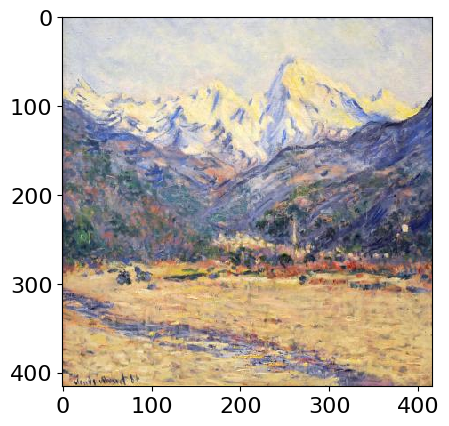

In [9]:
print(y_train[900])
plt.imshow(X_train[900], interpolation='nearest')
plt.show()

20


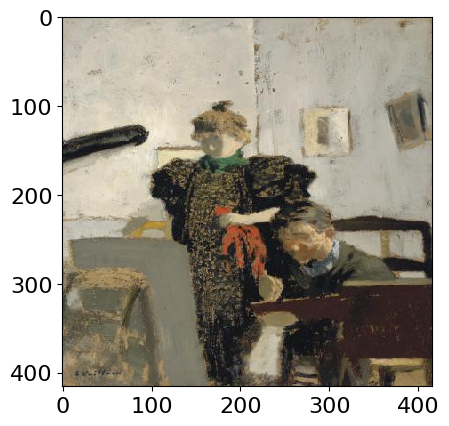

In [10]:
print(y_test[400])
plt.imshow(X_test[400], interpolation='nearest')
plt.show()

In [11]:
X_train[0]

array([[[ 91,  88,  79],
        [ 98,  95,  86],
        [105, 102,  93],
        ...,
        [105,  62,  55],
        [100,  57,  50],
        [ 96,  53,  46]],

       [[102,  99,  90],
        [106, 103,  94],
        [109, 106,  97],
        ...,
        [102,  59,  52],
        [ 97,  54,  47],
        [ 93,  50,  43]],

       [[115, 112, 103],
        [114, 111, 102],
        [112, 109, 100],
        ...,
        [ 98,  58,  50],
        [ 94,  54,  46],
        [ 91,  51,  43]],

       ...,

       [[ 93,  67,  50],
        [ 97,  70,  51],
        [ 98,  71,  52],
        ...,
        [ 99,  41,  65],
        [ 94,  34,  59],
        [ 83,  25,  49]],

       [[ 84,  58,  35],
        [ 92,  66,  41],
        [101,  74,  47],
        ...,
        [ 96,  40,  65],
        [ 91,  33,  58],
        [ 79,  23,  48]],

       [[ 84,  58,  31],
        [ 90,  65,  35],
        [ 98,  68,  40],
        ...,
        [ 95,  39,  64],
        [ 87,  31,  56],
        [ 76,  20,  45]]

In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
y_train

array([21, 20,  0, ..., 19, 21,  7], dtype=int64)

In [14]:
y_test

array([ 4, 12,  8, ...,  0, 12, 10], dtype=int64)

C:\csc6621\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 519168)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,453,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 28)                  │           3,612 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,473,756 (253.58 MB)

 Trainable params: 66,473,756 (253.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 755ms/step - accuracy: 0.0644 - loss: 10.2774 - val_accuracy: 0.1144 - val_loss: 11.6501
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.1218 - loss: 11.3148 - val_accuracy: 0.1131 - val_loss: 11.6501
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 382ms/step - accuracy: 0.1174 - loss: 11.3692 - val_accuracy: 0.1131 - val_loss: 11.6501
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 380ms/step - accuracy: 0.1127 - loss: 11.5033 - val_accuracy: 0.1131 - val_loss: 11.6501
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 0.1187 - loss: 11.2476 - val_accuracy: 0.1131 - val_loss: 11.6501


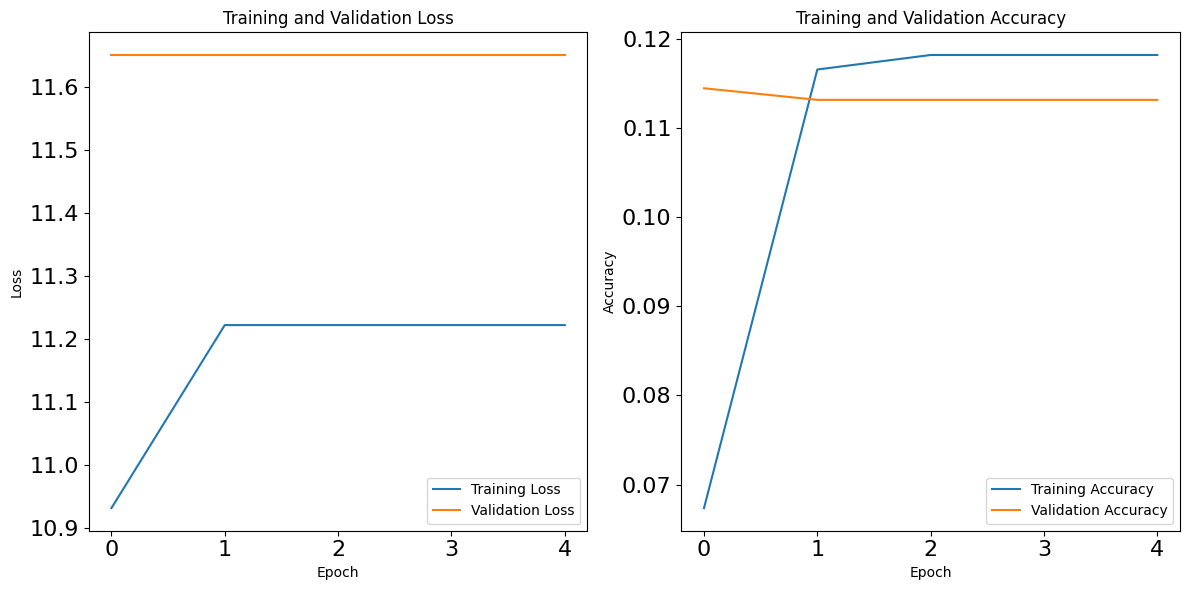

In [ ]:
# Define the DNN architecture
model_dnn = Sequential()
model_dnn.add(Flatten(input_shape=(416, 416, 3)))
model_dnn.add(Dense(128, activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(128, activation='relu'))
#model_dnn.add(Dropout(0.5))
model_dnn.add(Dense(28, activation='relu'))
#model_dnn.add(Dense(28, activation='relu'))

#model_dnn.add(Dense(28, activation='softmax'))

# Compile the DNN model
model_dnn.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_dnn.summary()

# Train the DNN model
history_dnn = model_dnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

plot_loss_accuracy(history_dnn)

# Evaluate the DNN model
loss_dnn, accuracy_dnn = model_dnn.evaluate(X_test, y_test)
print("DNN Model - Test Accuracy:", accuracy_dnn)

_______

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(416, 416, 3)))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(Flatten())

model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(32, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

# Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

plot_loss_accuracy(history_cnn)

# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test)
print("CNN Model - Test Accuracy:", accuracy_cnn)